# Atoms with Hyperfine Structure Examples

For atoms with hyperfine structure the nuclear spin `I` is no longer zero so there is coupling between the nuclear magnetic moment of the atom and the angular momentum of the electron cloud. This gives the atom hyperfine stucture.

Aims:
* Model Sodium transition (see Farrell 1988 paper - https://doi.org/10.1103/PhysRevA.37.4240)
* Model Mercury transitions
* Model Rubidium transitions
* Model Caesium transitions

In [1]:
%run "base-LASED/LASED/laser_atom_system.py"
%run "base-LASED/LASED/time_evolution.py"
%run "base-LASED/LASED/generate_sub_states.py"

import plotly.graph_objects as go
import time

## Including Hyperfine Structure

Hyperfine splitting of atomic energy levels is from the coupling of the nuclear-spin (iso-spin) I with the sum of the state's spin S and orbiatl angular momentum L. This results in a total angular momentum F:

$$
F = I + J = I + L + S
$$

If an atom has non-zero nuclear spin then the projection of the electron's angular momentum is $m_F$. This results in a different coupling between states (different dipole operator matrix element which couple two states together). The coupling between ground state |g> with angular momentum |F', m$_F$> and excited state |e> with angular momentum |F, m$_F$> is [[Farrell 1995]](https://doi.org/10.1088/0305-4470/28/1/023):

$$
C^q_{eg} = (-1)^{1/2(1+q)+1+2F+I+J'+S+L'+J-m_F}\sqrt{(2F+1)(2F'+1)(2J+1)(2J'+1)(2L+1)}\begin{pmatrix} F & 1 & F' \\ -m_F & q &m_F'\end{pmatrix}\begin{Bmatrix}J & F & I \\ F' & J' & 1\end{Bmatrix}\begin{Bmatrix}L & J & S \\ J' & L' & 1\end{Bmatrix}
$$

where q is the polarisation of the laser radiation: -1 if $\sigma+$, +1 if $\sigma-$, and 0 if $\pi$ and Q is -1 if q is equal to 1.


## Sodium D$_2$ Line

In Farrell's 1988 paper the orange Sodium D$_2$ line was modelled, specifically the 3$^2$S$_{1/2}$ (F' = 2) to the 3$^2$P$_{3/2}$ (F = 3,2,1) transition. See [Farrell's paper ](https://doi.org/10.1103/PhysRevA.37.4240) for the atomic level diagram and information about the hyperfine structure modelling. Farrell also compares the QED approach to the semi-classical (SC) model and shows that the SC model agrees with the QED model at low intensities but the approaches diverge at higher intensities.

The data for the Sodium D line can be found [here](https://steck.us/alkalidata/sodiumnumbers.1.6.pdf). 

In [2]:
# 3^2S_{1/2} -> 3^2P_{3/2}
wavelength_na = 589.159e-9  # Wavelength in nm
w_e = te.angularFreq(wavelength_na)
tau_na = 16.24  # in ns

I_Na = 3/2  # Isospin for sodium 

# Energy Splittings
w1 = 1.77*2*PI # Splitting of 3^2S_{1/2}(F = 1) - (F = 2) in Grad/s
w2 = 0.0158*2*PI  # Splitting between 3^2P_{3/2} (F = 0) and F = 1 in Grad/s
w3 = 0.0355*2*PI  # Splitting between 3^2P_{3/2} (F = 1) and F = 2 in Grad/s
w4 = 0.0595*2*PI  # Splitting between 3^2P_{3/2} (F = 2) and F = 3 in Grad/s

# Detunings
w_Fp1 = -1*w1
w_F0 = w_e-(w4+w3+w2)
w_F1 = w_e-(w4+w3)
w_F2 = w_e-w4
w_F3 = w_e

# Model 
# # 3^2S_{1/2} F' = 1
# s1 = State(label = 1, w = 0, m = -1, L = 0, S = 1/2, I = I_Na, F = 1)
Fp1 = generateSubStates(label_from = 1, w = w_Fp1, L = 0, S = 1/2, I = I_Na, F = 1)

# # 3^2S_{1/2} F' = 2
Fp2 = generateSubStates(label_from = 4, w = 0, L = 0, S = 1/2, I = I_Na, F = 2)

# # 3^2P_{3/2} F = 0
# s9 = State(label = 9, w = w_F0, m = 0, L = 1, S = 1/2, I = I_Na, F = 0)
F0 = generateSubStates(label_from = 9, w = w_F0, L = 1, S = 1/2, I = I_Na, F = 0)


# # # 3^2P_{3/2} F = 1
F1 = generateSubStates(label_from = 10, w = w_F1, L = 1, S = 1/2, I = I_Na, F = 1)
# s10 = State(label = 10, w = w_F1, m = -1, L = 1, S = 1/2, I = I_Na, F = 1)


# # # 3^2P_{3/2} F = 2 
F2 = generateSubStates(label_from = 13, w = w_F2, L = 1, S = 1/2, I = I_Na, F = 2)
# s13 = State(label = 13, w = w_F2, m = -2, L = 1, S = 1/2, I = I_Na, F = 2)


# # 3^2P_{3/2} F = 3
F3 = generateSubStates(label_from = 18, w = w_F3, L = 1, S = 1/2, I = I_Na, F = 3)

G_na = Fp1 + Fp2
E_na = F0 + F1 + F2 + F3

# Laser parameters
intensity_na = 85.6 # mW/mm^-2
Q_na = [0]
Q_decay = [1, 0, -1]

# Simulation parameters
start_time = 0
stop_time = 500 # in ns
time_steps = 501
time_na = np.linspace(start_time, stop_time, time_steps)

rabi = te.halfRabiFreq(intensity_na, tau_na, wavelength_na)
print(f"rabi = {rabi/np.sqrt(intensity_na)} Grad/s (mW/mm^-2)^-1/2")

def FarrellRabi(wavelength, tau, I):
    hbar = 1.0456e-34
    rabifreq = np.sqrt(3000*(wavelength**3)/(4*(PI**2)*C*tau*hbar))
    return rabifreq

for e in E_na:
    for g in G_na:
        for q in Q_na:
            c_eg = te.coupling(e, g, q)
            if(c_eg):
                print( f"C_{e.label},{g.label}^{q} = {c_eg}, rabi = {rabi*c_eg*1000/(np.sqrt(intensity_na)*PI)} Mhz/(mW/mm^-2)")

rabi = 0.0869877402901387 Grad/s (mW/mm^-2)^-1/2
C_9,2^0 = 0.235702260395516*sqrt(6), rabi = 6.52637349073739*sqrt(6) Mhz/(mW/mm^-2)
C_10,1^0 = -0.204124145231931*sqrt(10), rabi = -5.65200523756391*sqrt(10) Mhz/(mW/mm^-2)
C_10,5^0 = 0.158113883008419*sqrt(2), rabi = 4.37802443155242*sqrt(2) Mhz/(mW/mm^-2)
C_11,6^0 = 0.105409255338946*sqrt(6), rabi = 2.91868295436828*sqrt(6) Mhz/(mW/mm^-2)
C_12,3^0 = 0.204124145231931*sqrt(10), rabi = 5.65200523756391*sqrt(10) Mhz/(mW/mm^-2)
C_12,7^0 = 0.158113883008419*sqrt(2), rabi = 4.37802443155242*sqrt(2) Mhz/(mW/mm^-2)
C_13,4^0 = -0.408248290463863*sqrt(2), rabi = -11.3040104751278*sqrt(2) Mhz/(mW/mm^-2)
C_14,1^0 = -0.158113883008419*sqrt(10), rabi = -4.37802443155242*sqrt(10) Mhz/(mW/mm^-2)
C_14,5^0 = -0.204124145231932*sqrt(2), rabi = -5.65200523756391*sqrt(2) Mhz/(mW/mm^-2)
C_15,2^0 = -0.105409255338946*sqrt(30), rabi = -2.91868295436828*sqrt(30) Mhz/(mW/mm^-2)
C_16,3^0 = -0.158113883008419*sqrt(10), rabi = -4.37802443155242*sqrt(10) Mhz/(mW/mm

In [3]:
sodium_system = LaserAtomSystem(E_na, G_na, tau_na, Q_na, wavelength_na, 
                                 laser_intensity = intensity_na)
tic = time.perf_counter()
sodium_system.timeEvolution(time_na, pretty_print_eq = True)
toc = time.perf_counter()
print(f"The code finished in {toc-tic:0.4f} seconds")

Populating ground states equally as the initial condition.


The code finished in 1120.3524 seconds


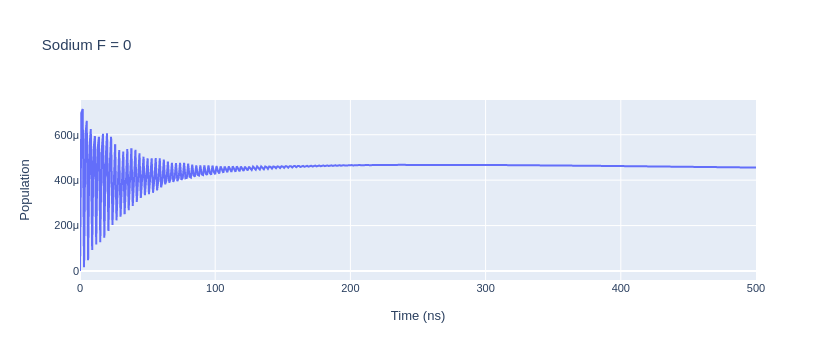

In [4]:
las_sys = sodium_system

rho_to_plot = [ [abs(rho) for rho in las_sys.Rho_t(s, s)] for s in F0]

fig_na = go.Figure()

for i, rho_ee in enumerate(rho_to_plot):
    fig_na.add_trace(go.Scatter(x = time_na, 
                                y = rho_ee,
                                name = f"m_F = {F0[i].m}",
                               mode = 'lines'))

fig_na.update_layout(title = "Sodium F = 0",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_na.write_image("NaF=0I=856.pdf")
fig_na.show()

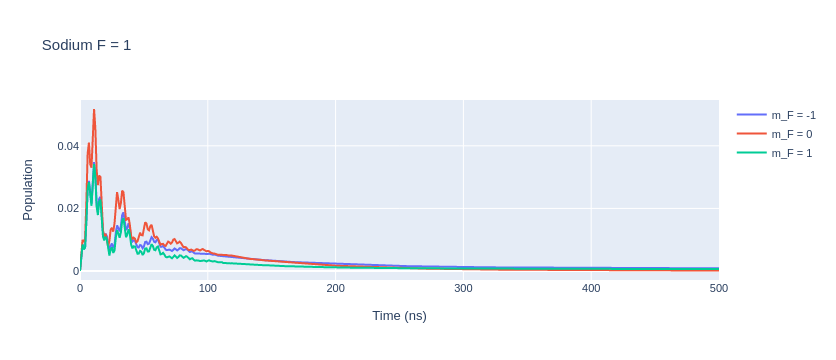

In [5]:
las_sys = sodium_system

rho_to_plot = [ [abs(rho) for rho in las_sys.Rho_t(s, s)] for s in F1]

fig_na = go.Figure()

for i, rho_ee in enumerate(rho_to_plot):
    fig_na.add_trace(go.Scatter(x = time_na, 
                                y = rho_ee,
                                name = f"m_F = {F1[i].m}",
                               mode = 'lines'))

fig_na.update_layout(title = "Sodium F = 1",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_na.write_image(f"NaF=1I=856.pdf")
fig_na.show()

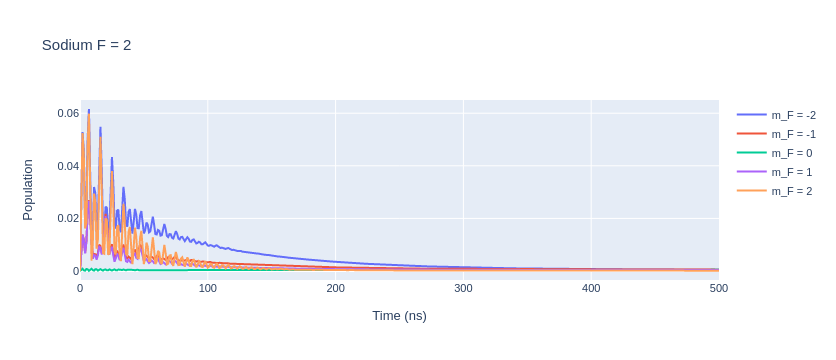

In [6]:
las_sys = sodium_system

rho_to_plot = [ [abs(rho) for rho in las_sys.Rho_t(s, s)] for s in F2]

fig_na = go.Figure()

for i, rho_ee in enumerate(rho_to_plot):
    fig_na.add_trace(go.Scatter(x = time_na, 
                                y = rho_ee,
                                name = f"m_F = {F2[i].m}",
                               mode = 'lines'))

fig_na.update_layout(title = "Sodium F = 2",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_na.write_image("NaF=2I=856.pdf")
fig_na.show()

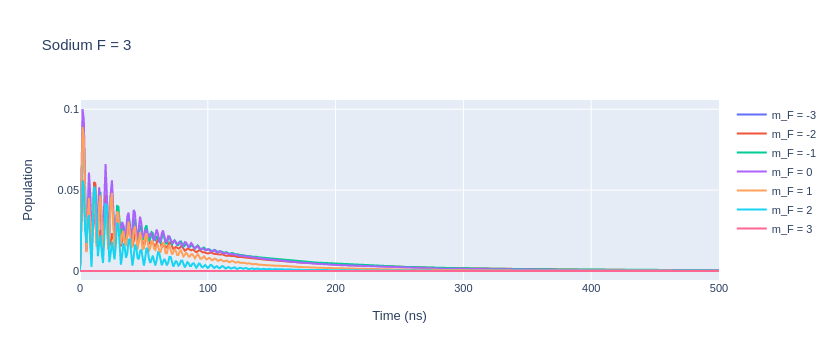

In [7]:
las_sys = sodium_system

rho_to_plot = [ [abs(rho) for rho in las_sys.Rho_t(s, s)] for s in F3]

fig_na = go.Figure()

for i, rho_ee in enumerate(rho_to_plot):
    fig_na.add_trace(go.Scatter(x = time_na, 
                                y = rho_ee,
                                name = f"m_F = {F3[i].m}",
                               mode = 'lines'))

fig_na.update_layout(title = "Sodium F = 3",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_na.write_image("NaF=3I=856.pdf")
fig_na.show()

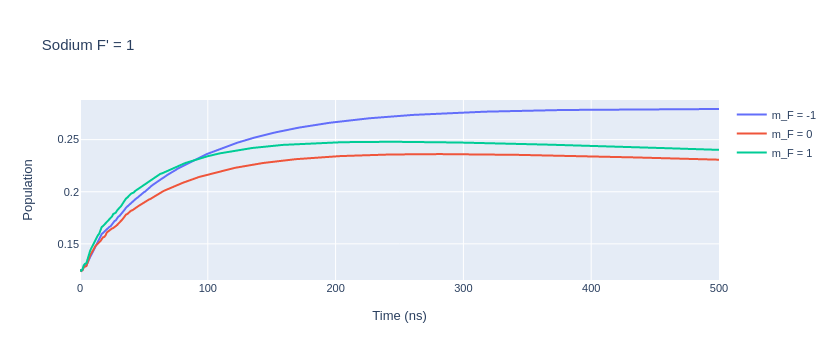

In [8]:
fig_na_lower = go.Figure()

rho_to_plot = [ [abs(rho) for rho in las_sys.Rho_t(s, s)] for s in Fp1]

for i, rho_gg in enumerate(rho_to_plot):
    fig_na_lower.add_trace(go.Scatter(x = time_na, 
                                y = rho_gg,
                                name = f"m_F = {Fp1[i].m}",
                               mode = 'lines'))
fig_na_lower.update_layout(title = "Sodium F' = 1",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_na.write_image("NaFp=1I=856.pdf")
fig_na_lower.show()

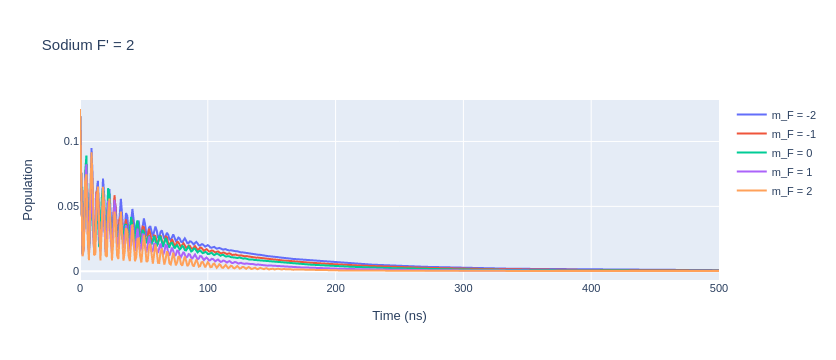

In [9]:
fig_na_lower = go.Figure()

rho_to_plot = [ [abs(rho) for rho in las_sys.Rho_t(s, s)] for s in Fp2]

for i, rho_gg in enumerate(rho_to_plot):
    fig_na_lower.add_trace(go.Scatter(x = time_na, 
                                y = rho_gg,
                                name = f"m_F = {Fp2[i].m}",
                               mode = 'lines'))
fig_na_lower.update_layout(title = "Sodium F' = 2",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_na.write_image("NaFp=2I=856.pdf")
fig_na_lower.show()

## Mercury

## Rubidium

## Caesium